In [ ]:
## Régression  polynomiale.



In [ ]:
1) Importer les librairies classiques : numpy, pandas, seaborn et matplolib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
2) Lire le fichier I_B.csv sous forme 

In [2]:
ib_doc = pd.read_csv("I_B.csv", sep = ";")
print(ib_doc)

     I         B
0    0  0.000000
1    1  0.296514
2    2  0.544183
3    3  0.751053
4    4  0.923846
5    5  1.068175
6    6  1.188728
7    7  1.289423
8    8  1.373530
9    9  1.443782
10  10  1.502462
11  11  1.551475
12  12  1.592415
13  13  1.626610
14  14  1.655173
15  15  1.679030
16  16  1.698957
17  17  1.715602
18  18  1.729505
19  19  1.741118
20  20  1.750817
21  21  1.758919
22  22  1.765686
23  23  1.771339
24  24  1.776060
25  25  1.780004


In [ ]:
3) Combien d'élément, valeur max, min

In [3]:
taille = ib_doc.shape
max_b =max(ib_doc['B'])
max_i = max(ib_doc['I'])
min_b = min(ib_doc['B'])
min_i = min(ib_doc['I'])



print(taille)
print(max_b)
print(max_i)
print(min_b)
print(min_i)



(26, 2)
1.780003806231164
25
0.0
0


In [ ]:
4) Tracer B(I), sous forme de nouage de points

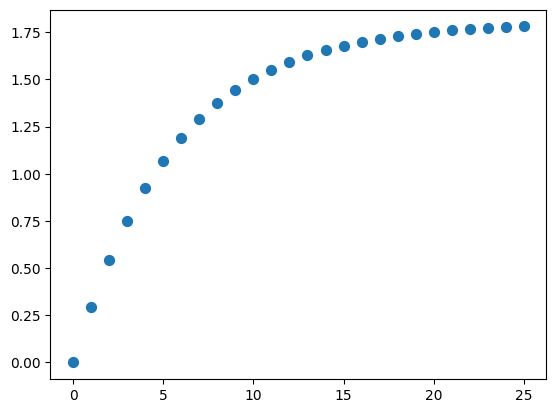

In [4]:
plt.scatter(ib_doc['I'],ib_doc['B'],s = 50)
plt.show()

In [ ]:
5) Séparer les deux collones du fichier en 4 listes de données X_train, X_test, Y_train, Y_test avec 80 pourcent pour train
   et 20% pour test. en utilisant: from sklearn.model_selection import train_test_split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(ib_doc['I'],ib_doc['B'],test_size=0.2)

In [ ]:
6)Verifeir le pourcentage de la séparation 

In [7]:
perc_sep = 100 * len(X_test)/len(ib_doc['I'])
print(perc_sep)

23.076923076923077


In [ ]:
7) Mettre X_train et Y_train sous forme de liste.values.reshape(-1,1)


In [8]:
x_train = X_train.values.reshape(-1,1)
y_train = Y_train.values.reshape(-1,1)
y_test = Y_test.values.reshape(-1,1)
x_test = X_test.values.reshape(-1,1)

In [ ]:
8) Tracer plot(x_train,y_train,'*')

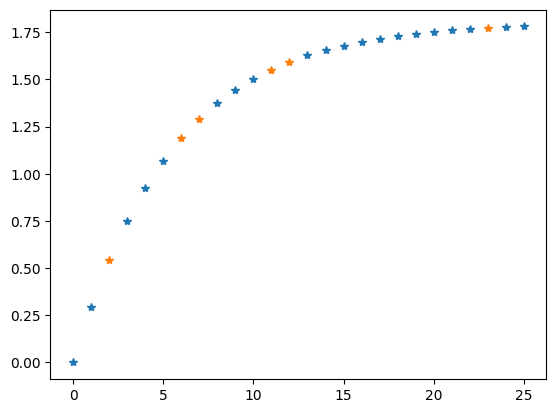

In [9]:
plt.plot(x_train,y_train,'*')
plt.plot(x_test,y_test,'*')
plt.show()

In [ ]:
9) Conception du modèle

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
poly = PolynomialFeatures(degree = 5)
model =LinearRegression()

# on modélise les données par une fonction polynomiale, l'argument degree en détermine le degres. 

In [ ]:
10) Entrainement et prédiction  rmse(root mean squared error), score pour train ,  score pour les données d'entrainement 

In [12]:
X_TRANS = poly.fit_transform(x_train)
model.fit(X_TRANS,y_train)
# transforme la donnée x -> [x,x^2,x^3,x^4,x^5] avant de faire une regression linéaire sur ce vecteur 

Y_NEW = model.predict(X_TRANS)
rmse = np.sqrt(mean_squared_error(y_train,Y_NEW))
# mean_squared_error calcul la somme des différences au carrés entre le y réels et les y prédits par le modèle 
r2_score_train = r2_score(y_train,Y_NEW)

print(rmse)
print(r2_score_train)

0.0008139238725118714
0.9999974658599384


In [ ]:
11) Prediction: rmse(root mean squared error)  , score pour test, coef et intercept

In [13]:
X_trans_test = poly.fit_transform(x_test)
Y_new_test = model.predict(X_trans_test)
rmse_test = np.sqrt(mean_squared_error(y_test,Y_new_test))
r2_score_test = r2_score(y_test,Y_new_test)

print(rmse_test)
print(r2_score_test)
print(X_trans_test)

0.0013240381996369437
0.9999889454574026
[[1.000000e+00 1.200000e+01 1.440000e+02 1.728000e+03 2.073600e+04
  2.488320e+05]
 [1.000000e+00 7.000000e+00 4.900000e+01 3.430000e+02 2.401000e+03
  1.680700e+04]
 [1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
  3.200000e+01]
 [1.000000e+00 1.100000e+01 1.210000e+02 1.331000e+03 1.464100e+04
  1.610510e+05]
 [1.000000e+00 6.000000e+00 3.600000e+01 2.160000e+02 1.296000e+03
  7.776000e+03]
 [1.000000e+00 2.300000e+01 5.290000e+02 1.216700e+04 2.798410e+05
  6.436343e+06]]


In [ ]:
12) Donner les valeurs: intercept_ et coef_

In [14]:
pente = model.intercept_
origine = model.coef_

print(pente)
print(origine)

[0.00120406]
[[ 0.00000000e+00  3.19200952e-01 -2.67184278e-02  1.27733870e-03
  -3.32997158e-05  3.63316507e-07]]


In [ ]:
13) vérifications:  13-1 Calculer B pour i= 10A, 13-2 Calculer B pour  I=[1.5, 2.4, 5.6, 10.5, 15.2,10, 20.8,25.]

[[0.42403422]
 [0.62997025]
 [1.14441291]
 [1.50204399]
 [1.52739589]
 [1.68306311]
 [1.75732489]
 [1.78093899]]


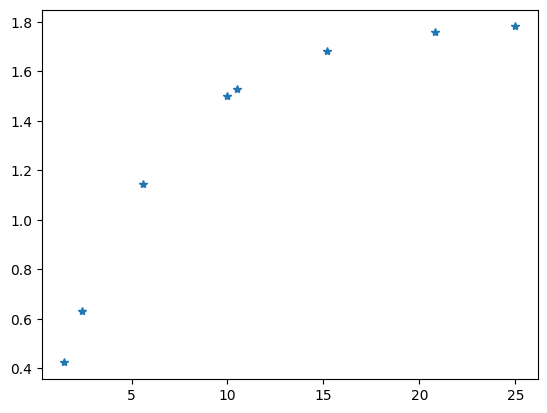

In [16]:
I=np.array([1.5, 2.4, 5.6,10, 10.5, 15.2, 20.8,25.])
i = np.reshape(I,(-1,1))
I_TRANS = poly.fit_transform(i)
B = model.predict(I_TRANS)
print(B)
plt.plot(i,B,'*')
plt.show()
